In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'adult-income-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F222%2F472%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240713%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240713T215601Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D8ebcf1f4e85f5452a68fa17cd58dd5ab1f7e44247712ff5d14d5fdef090ac00dfdf2072946b865ce3ee1771492cf016d1a982fada8546c4cdc31de9376e1545afb61359b2a5ea75e37b96168d4dd08f006ed63d0fbd04205f565dc8377cf1f39406a4970851f2f5b120658feeaec369e95dea55952f987f71fe9d1a7334c987777a5d61aba996652046c0ba6bbbc6fcd80eb9280b004d69209a87ecc24849cc7340b903ac0e9f2f721c238c5c36a276d5311b1804f95db87532ee091e00e61fc165760b965ae3a5dd7f472e8520505eb0f4ead0f190cb4387c4ea6c1a9642f94976acd07f581debc7cda2790fb265beaab83bf34c5dc6c6678f32636d1730c8b'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 667679 bytes downloaded
Downloaded and uncompressed: adult-income-dataset
Data source import complete.


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adult-income-dataset/adult.csv


In [3]:
df=pd.read_csv(r'/kaggle/input/adult-income-dataset/adult.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
non_white = (df['race'] != 'White')
white = (df['race'] == 'White')
male =  (df['gender'] == 'Male')
female = (df['gender'] == 'Female')
white_males = df[(white) & (male)]
white_females = df[(white) & (female)]
non_white_males = df[(non_white) &(male)]
non_white_females = df[(non_white) & (female)]
white_males_over_50k = len(white_males[white_males['income'] == '>50K'])
white_males_under_50k = len(white_males[white_males['income'] == '<=50K'])
white_females_over_50k = len(white_females[white_females['income'] == '>50K'])
white_females_under_50k = len(white_females[white_females['income'] == '<=50K'])
# Calculate counts for non-white
non_white_males_over_50k = len(non_white_males[non_white_males['income'] == '>50K'])
non_white_males_under_50k = len(non_white_males[non_white_males['income'] == '<=50K'])
non_white_females_over_50k = len(non_white_females[non_white_females['income'] == '>50K'])
non_white_females_under_50k = len(non_white_females[non_white_females['income'] == '<=50K'])

total_individuals = len(df)
total_white_individuals = sum(white)
total_non_white_individuals = sum(non_white)

# Calculate the number of white and non-white individuals
total_white_individuals = sum(white)
total_non_white_individuals = sum(non_white)
on_white_percent = (total_non_white_individuals / total_individuals) * 100
white_percent = (total_white_individuals / total_individuals) * 100
non_white_percent = (total_non_white_individuals / total_individuals) * 100


print("Percentage of white people in the dataset: ", white_percent)
print("Percentage of non-white people in the dataset: ",non_white_percent)

# Calculate the percentages of income levels for white males and females
percentageOverMales = (white_males_over_50k / total_individuals) * 100
percentageUnderMales = (white_males_under_50k / total_individuals) * 100
percentageOverFemales = (white_females_over_50k / total_individuals) * 100
percentageUnderFemales = (white_females_under_50k / total_individuals) * 100

print(f"Percentage of white males with income >50K: {percentageOverMales:.2f}%")
print(f"Percentage of white males with income <=50K: {percentageUnderMales:.2f}%")
print(f"Percentage of white females with income >50K: {percentageOverFemales:.2f}%")
print(f"Percentage of white females with income <=50K: {percentageUnderFemales:.2f}%")

# Calculate the percentages of income levels for non-white males and females
non_percentageOverMales = (non_white_males_over_50k / total_individuals) * 100
non_percentageUnderMales = (non_white_males_under_50k / total_individuals) * 100
non_percentageOverFemales = (non_white_females_over_50k / total_individuals) * 100
non_percentageUnderFemales = (non_white_females_under_50k / total_individuals) * 100

print(f"Percentage of non-white males with income >50K: {non_percentageOverMales:.2f}%")
print(f"Percentage of non-white males with income <=50K: {non_percentageUnderMales:.2f}%")
print(f"Percentage of non-white females with income >50K: {non_percentageOverFemales:.2f}%")
print(f"Percentage of non-white females with income <=50K: {non_percentageUnderFemales:.2f}%")



Percentage of white people in the dataset:  85.5042791040498
Percentage of non-white people in the dataset:  14.495720895950207
Percentage of white males with income >50K: 18.56%
Percentage of white males with income <=50K: 40.27%
Percentage of white females with income >50K: 3.16%
Percentage of white females with income <=50K: 23.51%
Percentage of non-white males with income >50K: 1.75%
Percentage of non-white males with income <=50K: 6.27%
Percentage of non-white females with income >50K: 0.46%
Percentage of non-white females with income <=50K: 6.02%


workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64


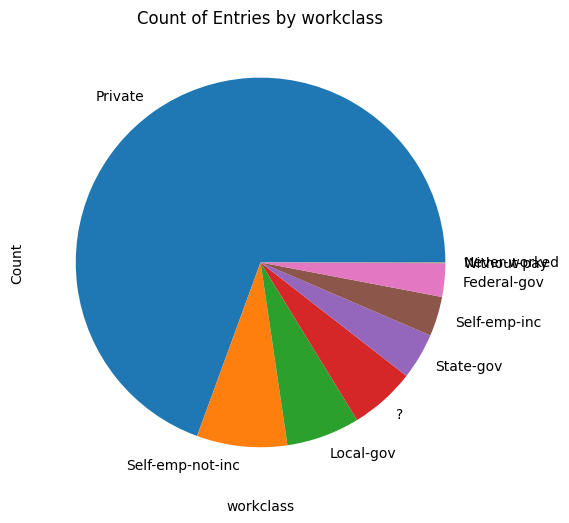

In [11]:
column_data = df['workclass'].value_counts()
print(column_data)
plt.figure(figsize=(12, 6))
column_data.plot(kind='pie')
plt.title('Count of Entries by workclass')
plt.xlabel('workclass')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64


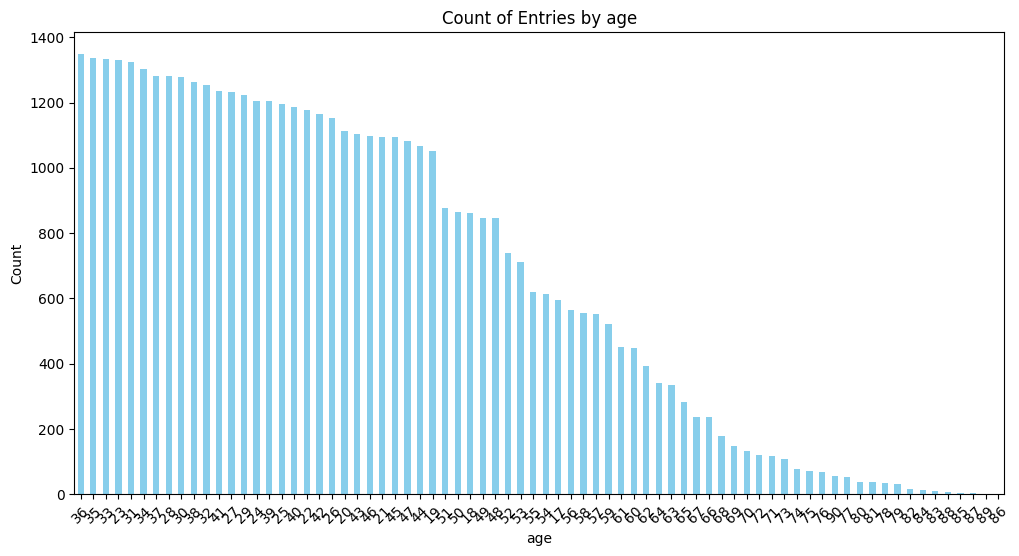

In [12]:
column_data = df['age'].value_counts()
print(column_data)
plt.figure(figsize=(12, 6))
column_data.plot(kind='bar', color='skyblue')
plt.title('Count of Entries by age')
plt.xlabel('age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64


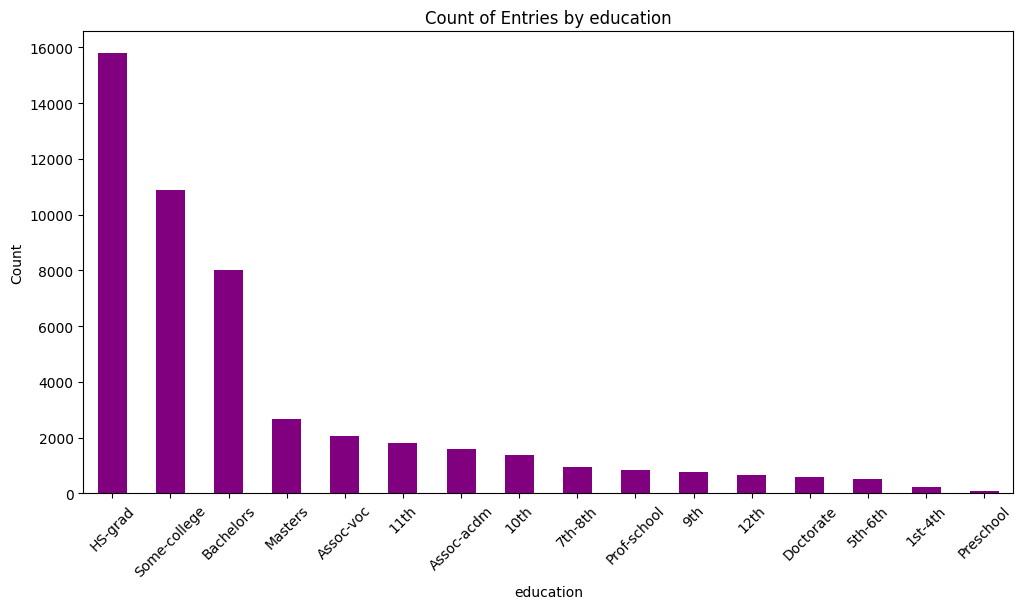

In [13]:
column_data = df['education'].value_counts()
print(column_data)
plt.figure(figsize=(12, 6))
column_data.plot(kind='bar', color='purple')
plt.title('Count of Entries by education')
plt.xlabel('education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64


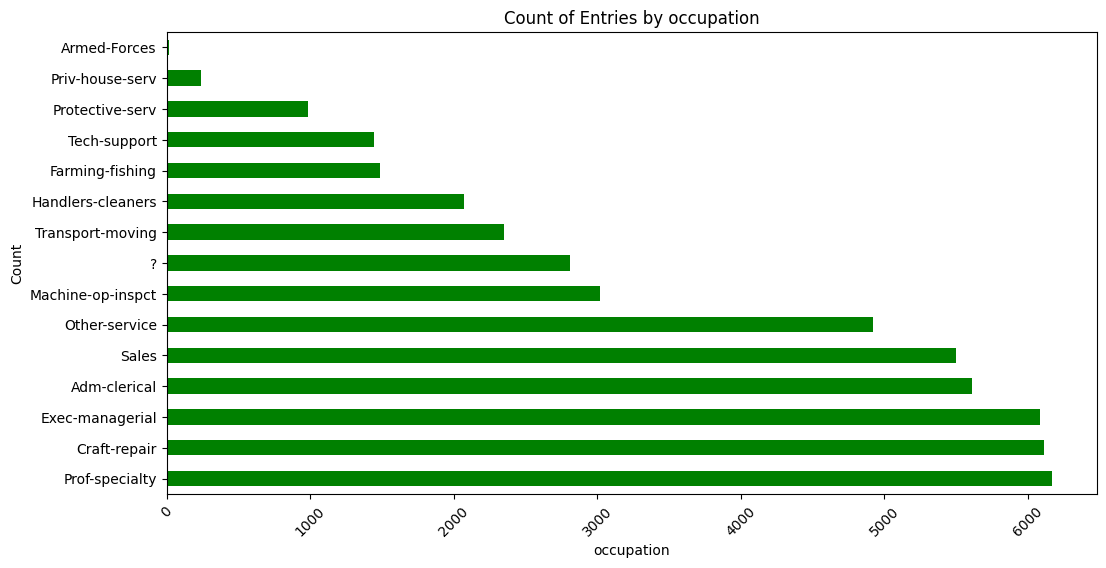

In [14]:
column_data = df['occupation'].value_counts()
print(column_data)
plt.figure(figsize=(12, 6))
column_data.plot(kind='barh', color='green')
plt.title('Count of Entries by occupation')
plt.xlabel('occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

relationship
Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: count, dtype: int64


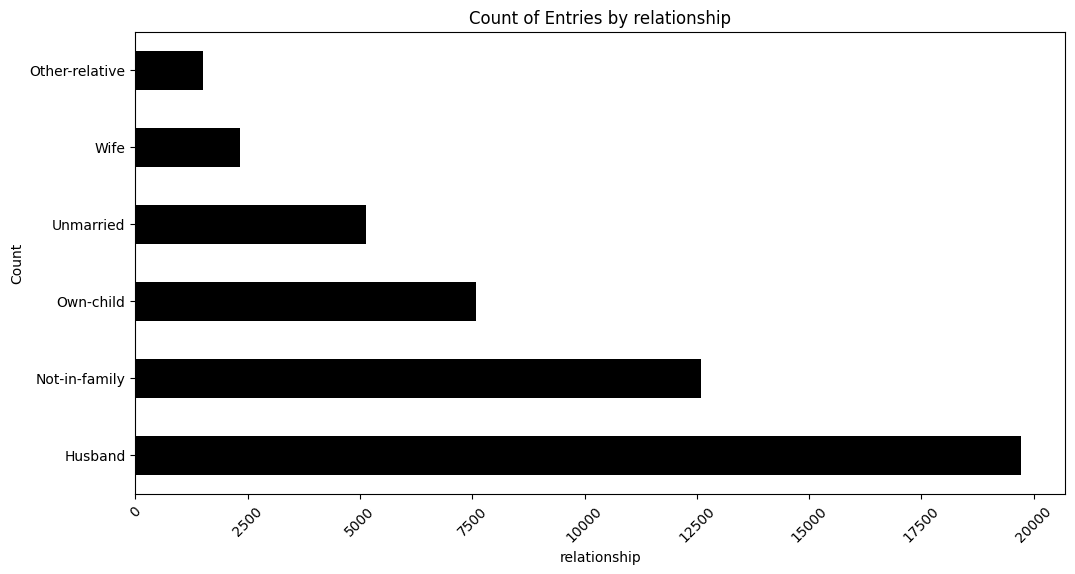

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64


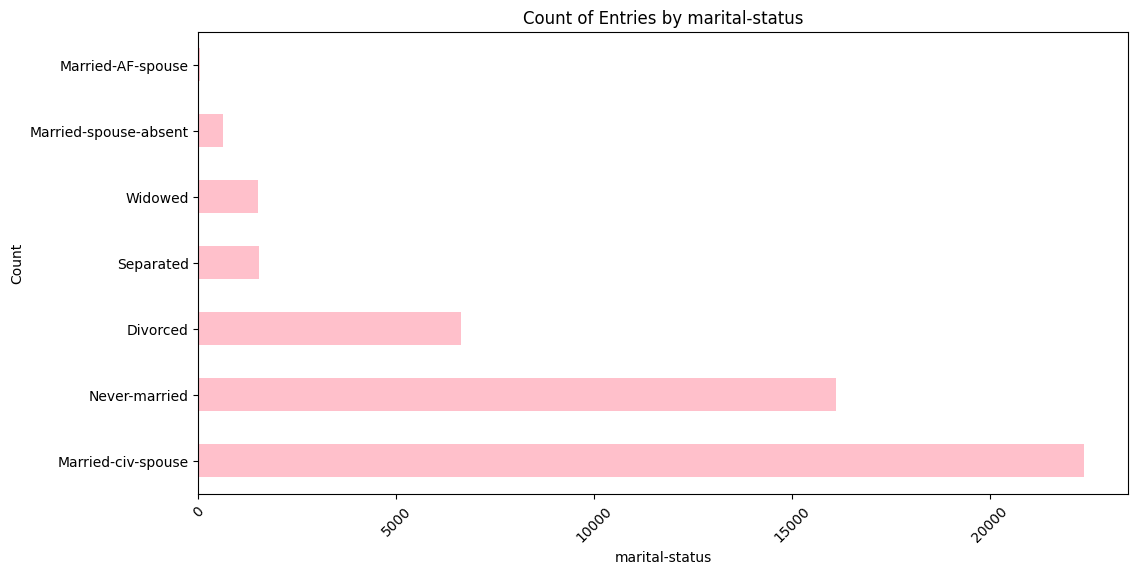

In [15]:
column_data = df['relationship'].value_counts()
print(column_data)
plt.figure(figsize=(12, 6))
column_data.plot(kind='barh', color='black')
plt.title('Count of Entries by relationship')
plt.xlabel('relationship')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
column_data = df['marital-status'].value_counts()
print(column_data)
plt.figure(figsize=(12, 6))
column_data.plot(kind='barh', color='pink')
plt.title('Count of Entries by marital-status')
plt.xlabel('marital-status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


native-country
United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

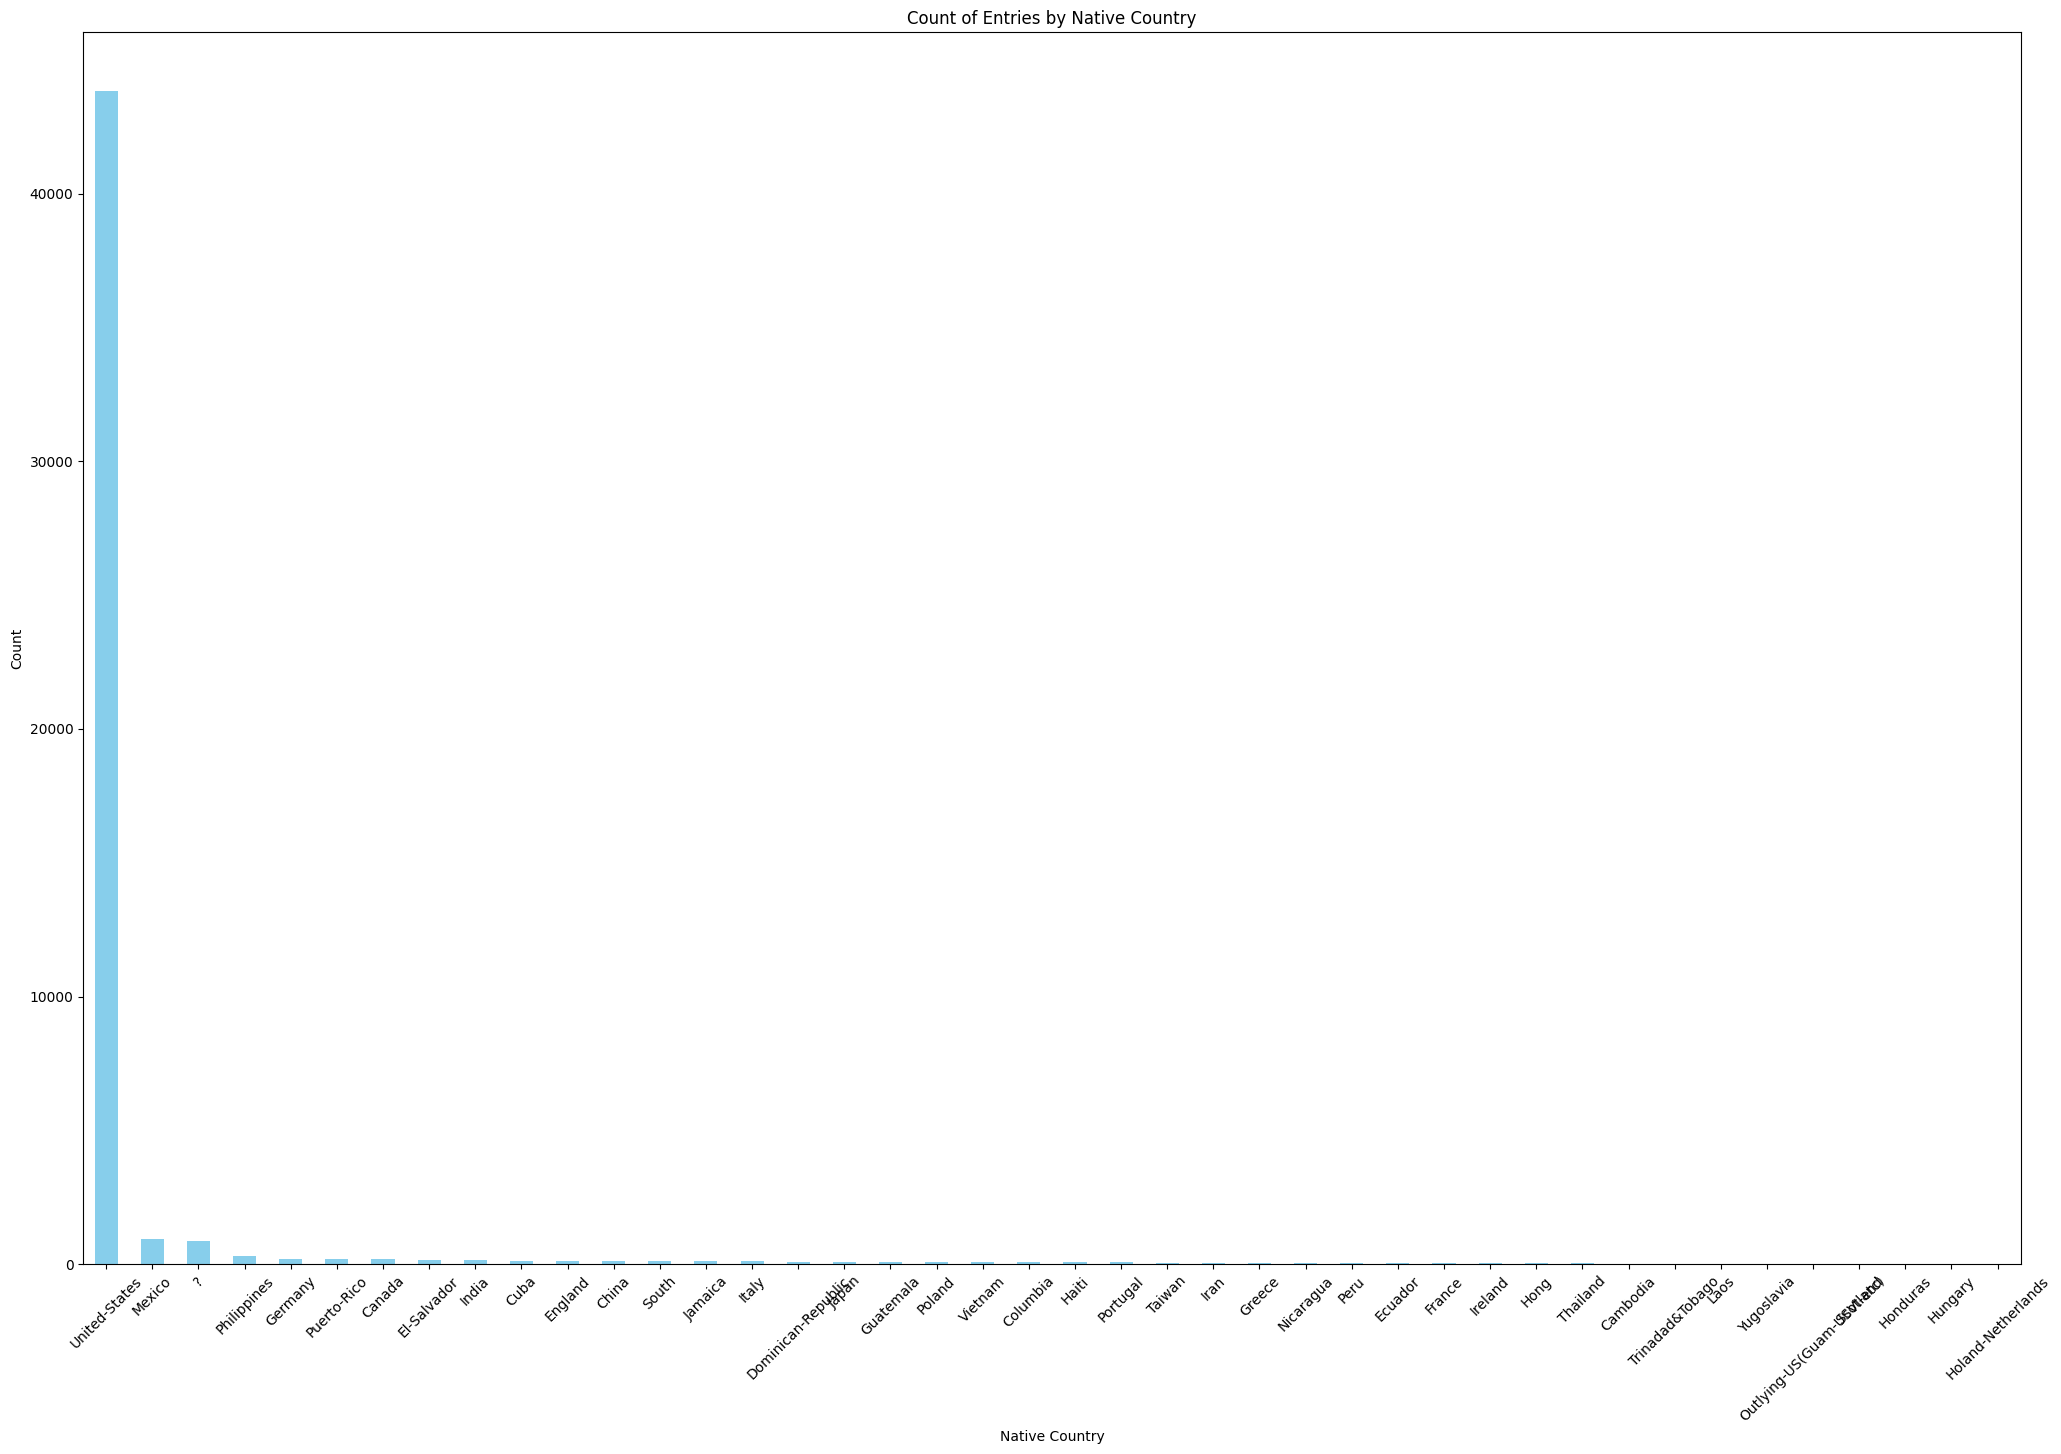

In [17]:
column_data = df['native-country'].value_counts()
print(column_data)
plt.figure(figsize=(25, 16))
column_data.plot(kind='bar', color='skyblue')
plt.title('Count of Entries by Native Country')
plt.xlabel('Native Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()




In [18]:
column_data = df['fnlwgt'].value_counts()
print(column_data)
print('================================================================')
column_data = df['educational-num'].value_counts()
print(column_data)
print('================================================================')
column_data = df['race'].value_counts()
print(column_data)
print('================================================================')
column_data = df['gender'].value_counts()
print(column_data)
print('================================================================')
column_data = df['capital-loss'].value_counts()
print(column_data)
print('================================================================')
column_data = df['hours-per-week'].value_counts()
print(column_data)
print('================================================================')
column_data = df['income'].value_counts()
print(column_data)



fnlwgt
203488    21
190290    19
120277    19
125892    18
126569    18
          ..
188488     1
285290     1
293579     1
114874     1
257302     1
Name: count, Length: 28523, dtype: int64
educational-num
9     15784
10    10878
13     8025
14     2657
11     2061
7      1812
12     1601
6      1389
4       955
15      834
5       756
8       657
16      594
3       509
2       247
1        83
Name: count, dtype: int64
race
White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64
gender
Male      32650
Female    16192
Name: count, dtype: int64
capital-loss
0       46560
1902      304
1977      253
1887      233
2415       72
        ...  
2465        1
2080        1
155         1
1911        1
2201        1
Name: count, Length: 99, dtype: int64
hours-per-week
40    22803
50     4246
45     2717
60     2177
35     1937
      ...  
69        1
87        1
94        1
82        1

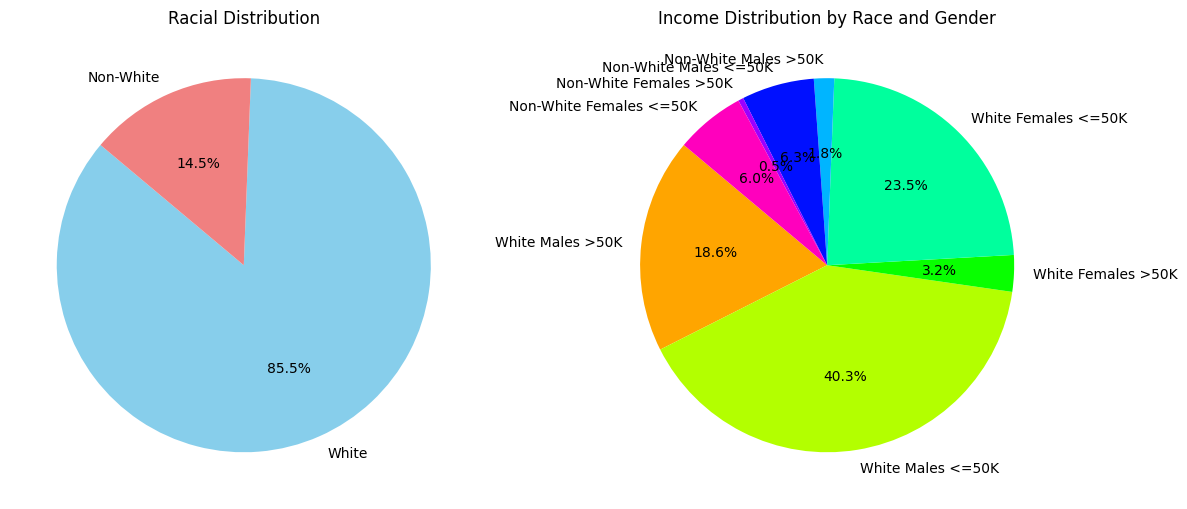

In [19]:
racial_distribution = [85.5042791040498, 14.495720895950207]
income_distribution = [
    18.56, 40.27, 3.16, 23.51, 1.75, 6.27, 0.46, 6.02
]
income_labels = [
    'White Males >50K', 'White Males <=50K',
    'White Females >50K', 'White Females <=50K',
    'Non-White Males >50K', 'Non-White Males <=50K',
    'Non-White Females >50K', 'Non-White Females <=50K'
]
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(racial_distribution, labels=['White', 'Non-White'], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Racial Distribution')


plt.subplot(1, 2, 2)
plt.pie(income_distribution, labels=income_labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("hsv", 8))
plt.title('Income Distribution by Race and Gender')

plt.tight_layout()
plt.show()

In [20]:
gender_group = df.groupby(['gender', 'income']).size().reset_index(name='count')
gender_group


,gender,income,count
0,Female,<=50K,14423
1,Female,>50K,1769
2,Male,<=50K,22732
3,Male,>50K,9918


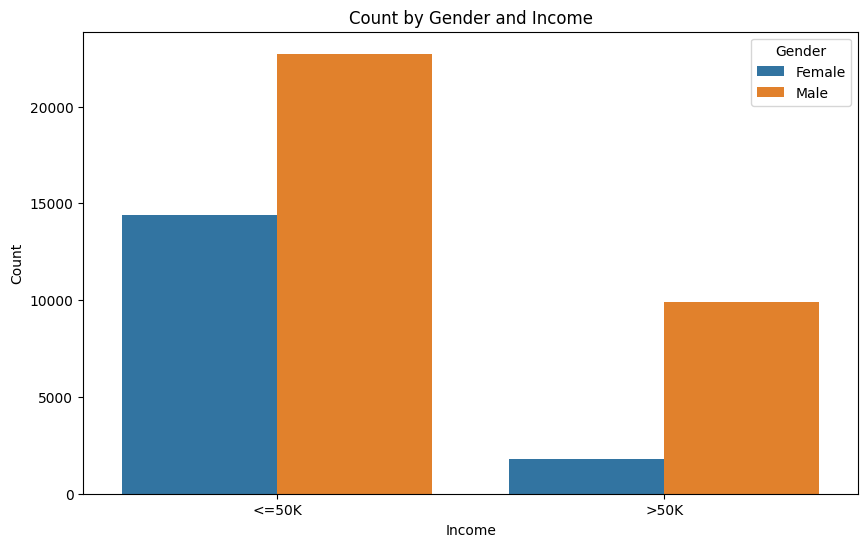

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(data=gender_group, x='income', y='count', hue='gender')
plt.title('Count by Gender and Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

In [22]:
gender_group = df.groupby(['race', 'income']).size().reset_index(name='count')
gender_group

,race,income,count
0,Amer-Indian-Eskimo,<=50K,415
1,Amer-Indian-Eskimo,>50K,55
2,Asian-Pac-Islander,<=50K,1110
3,Asian-Pac-Islander,>50K,409
4,Black,<=50K,4119
5,Black,>50K,566
6,Other,<=50K,356
7,Other,>50K,50
8,White,<=50K,31155
9,White,>50K,10607


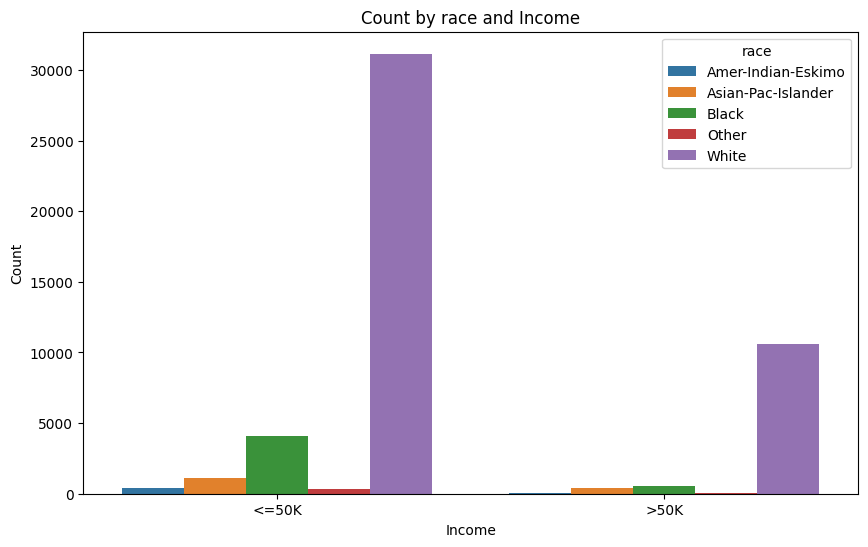

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(data=gender_group, x='income', y='count', hue='race')
plt.title('Count by race and Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.legend(title='race')
plt.show()

In [24]:
gender_group = df.groupby(['relationship', 'income']).size().reset_index(name='count')
gender_group

,relationship,income,count
0,Husband,<=50K,10870
1,Husband,>50K,8846
2,Not-in-family,<=50K,11307
3,Not-in-family,>50K,1276
4,Other-relative,<=50K,1454
5,Other-relative,>50K,52
6,Own-child,<=50K,7470
7,Own-child,>50K,111
8,Unmarried,<=50K,4816
9,Unmarried,>50K,309


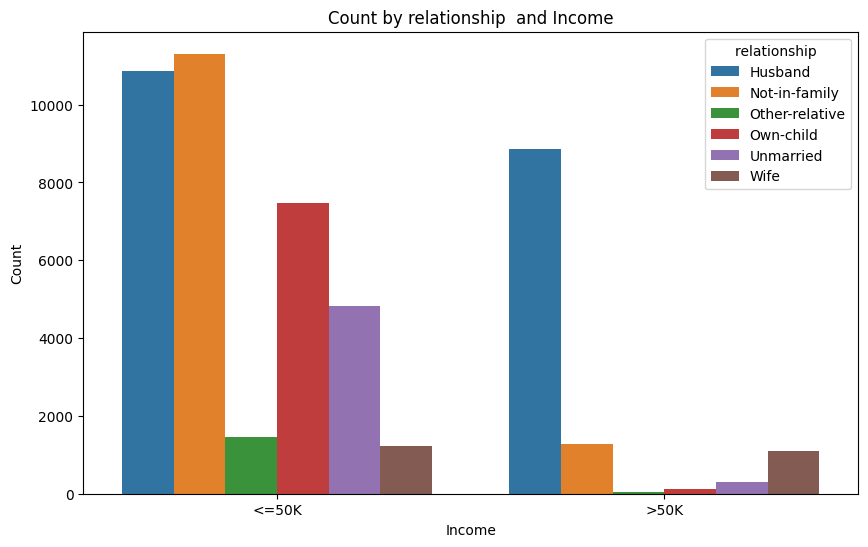

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(data=gender_group, x='income', y='count', hue='relationship')
plt.title('Count by relationship  and Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.legend(title='relationship ')
plt.show()

income  <=50K  >50K
age                
17        595     0
18        862     0
19       1050     3
20       1112     1
21       1090     6
..        ...   ...
86          1     0
87          3     0
88          5     1
89          2     0
90         42    13

[74 rows x 2 columns]


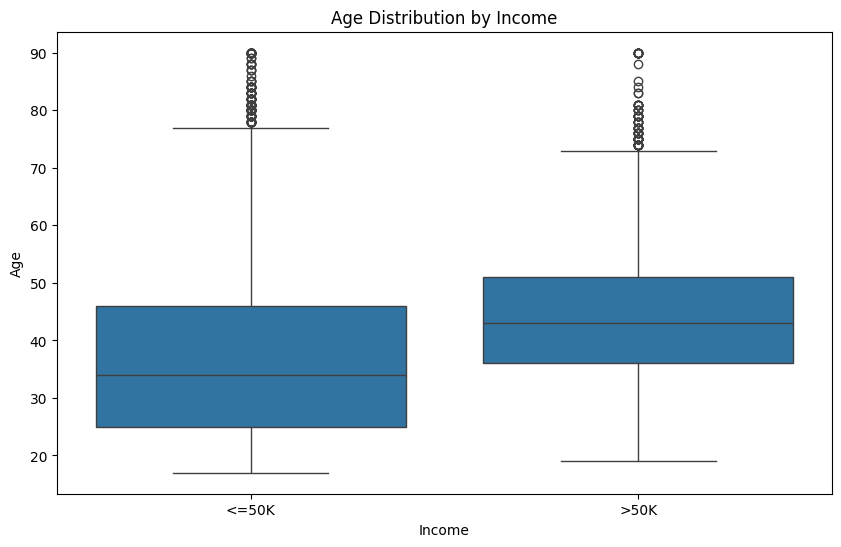

In [26]:
crosstab = pd.crosstab(df['age'], df['income'])
print(crosstab)
plt.figure(figsize=(10, 6))
sns.boxplot(x='income', y='age', data=df)
plt.title('Age Distribution by Income')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

<Axes: xlabel='hours-per-week', ylabel='income'>

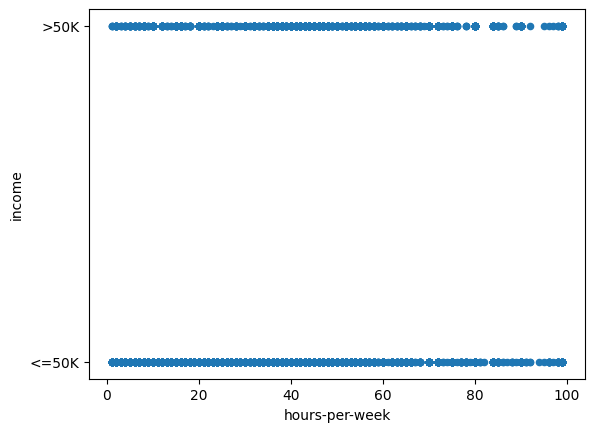

In [27]:
df.plot.scatter(y='income', x='hours-per-week')

<Axes: xlabel='age', ylabel='income'>

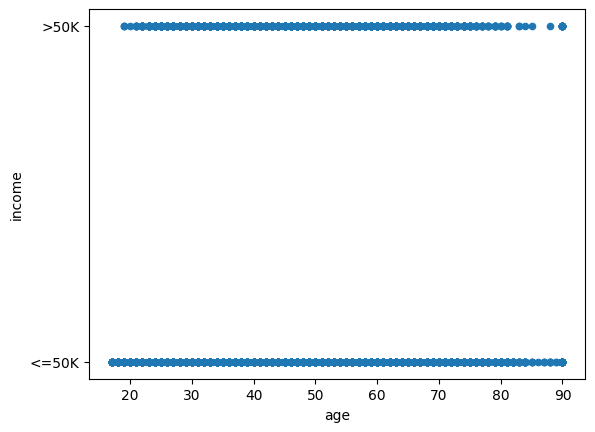

In [28]:
df.plot.scatter(y='income', x='age')

<Axes: xlabel='age', ylabel='relationship'>

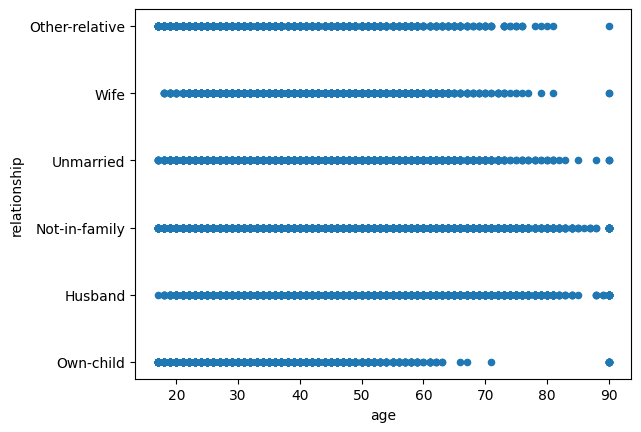

In [29]:
df.plot.scatter(x='age', y='relationship')

<Axes: xlabel='income', ylabel='capital-loss'>

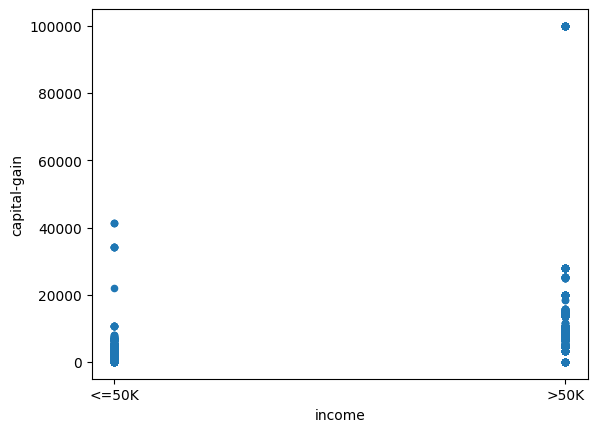

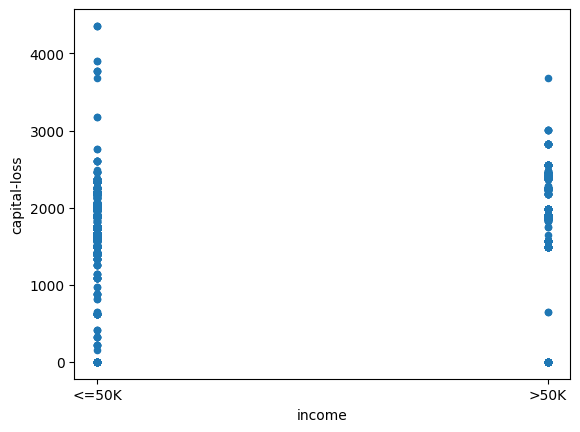

In [30]:
df.plot.scatter(x='income', y='capital-gain')
df.plot.scatter(x='income', y='capital-loss')

#captial-gain
There is a weak positive correlation between income and capital loss. This means that as income increases, capital loss tends to increase as well. However, the correlation is not strong, and there is a lot of scatter in the data.


#captial-loss
The correlation between capital loss and income is 0.23, which is a weak positive correlation. This means that there is a slight tendency for investors with higher incomes to have higher capital losses. However, the correlation is not strong, and there is a lot of variability in the data.

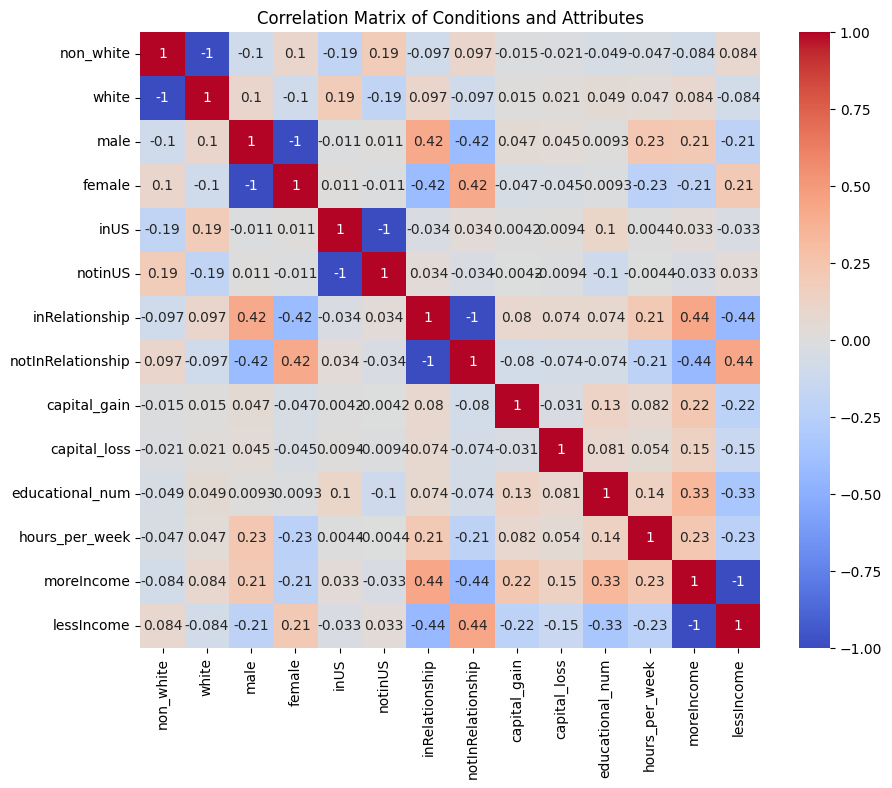

In [31]:
non_white = (df['race'] != 'White')
white = (df['race'] == 'White')
male = (df['gender'] == 'Male')
female = (df['gender'] == 'Female')
inUS = (df['native-country'] == 'United-States')
notinUS = (df['native-country'] != 'United-States')
inRelationship = (df['marital-status'].isin(['Married-civ-spouse', 'Married-AF-spouse', 'Married-spouse-absent']))
notInRelationship = ~inRelationship
moreIncome = (df['income']=='>50K')
lessIncome = ~moreIncome
# Additional attributes from the dataset
capital_gain = df['capital-gain']
capital_loss = df['capital-loss']
educational_num = df['educational-num']
hours_per_week = df['hours-per-week']

# Create a new DataFrame with all conditions and attributes
conditions_df = pd.DataFrame({
    'non_white': non_white,
    'white': white,
    'male': male,
    'female': female,
    'inUS': inUS,
    'notinUS': notinUS,
    'inRelationship': inRelationship,
    'notInRelationship': notInRelationship,
    'capital_gain': capital_gain,
    'capital_loss': capital_loss,
    'educational_num': educational_num,
    'hours_per_week': hours_per_week,
    'moreIncome':moreIncome,
    'lessIncome':lessIncome,
})

# Compute the correlation matrix
corr_matrix = conditions_df.corr()

# Plotting the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Conditions and Attributes')
plt.show()

Y(Target)is income column
x(are the features)(the first 14 cols)